# GET API TWITTER

In [ ]:
import tweepy
from tweepy import OAuthHandler

consumer_key = '9fAWDq0k0DGehVaJPmgcGRsg9'
consumer_secret = 'Dq8z9h5yvBDZKLycNZbQEnsmg7LPmqmgfKZWDXcRFGNl6HWbNC'
access_token = '1116984191181185026-gX1Cw1h2nfkE8cawyhSA2livgHvo2U'
access_secret = 'p74nWDzExKvRpW94utcRRKlotIFlb43mXDXYmgPalrxf3'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
for status in tweepy.Cursor(api.home_timeline).items(10):
    # Process a single status
    print(status.text)

Kini, banyak perubahan yang berguna untuk kenyamananmu, salah satunya #Bagusnya4GTelkomsel yang ada tukar-tambah un… https://t.co/XGMIHyaI28
Harus kuliah atau bekerja di luar kota yang jauh dan keluarga? Ga perlu khawatir, kamu tetap bisa lancar berhubunga… https://t.co/Hcz58TxZgr
Test
Buat kamu pemenang Ngabuburit Seru bareng Veronika, yuk cek kembali nomor yang digunakanan untuk ikutan kuis Ngabub… https://t.co/PxeFBAOgzo
#WeekendDeal Games kembali lagi buat bikin momen gaming kamu lebih maksimal. Dengan 7 ribu kamu bisa beli 40 vouche… https://t.co/lX3G4iEIlr
Rindu sama keluarga yang jauh di sana? Coba hubungi mereka, pasti rasa kangen kamu langsung terobati.

Biar ngobrol… https://t.co/nqskDJU2HM
Besok pagi DC United dan New England Revolution akan bertanding dalam liga Major League Soccer. Siapakah yang akan… https://t.co/CYwBA7plv1
Yuk ikutan #PestaKuota!

Cukup isi pulsa minimal Rp 20.000, kamu bisa dapat Ekstra Kuota hingga 10GB! Kamu bisa str… https://t.co/GP3k3cPg9r
Cari tahu

In [ ]:
!pip install simplejson

     |████████████████████████████████| 81kB 3.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/5d/1a/1e/0350bb3df3e74215cd91325344cc86c2c691f5306eb4d22c77
Successfully built simplejson


In [ ]:
import simplejson as json

def process_or_store(tweet):
    print(json.dumps(tweet))

for status in tweepy.Cursor(api.home_timeline).items(10):
    # Process a single status
    process_or_store(status._json)

{"created_at": "Sun Jul 14 03:02:57 +0000 2019", "id": 1150239231287017472, "id_str": "1150239231287017472", "text": "Kini, banyak perubahan yang berguna untuk kenyamananmu, salah satunya #Bagusnya4GTelkomsel yang ada tukar-tambah un\u2026 https://t.co/XGMIHyaI28", "truncated": true, "entities": {"hashtags": [{"text": "Bagusnya4GTelkomsel", "indices": [70, 90]}], "symbols": [], "user_mentions": [], "urls": [{"url": "https://t.co/XGMIHyaI28", "expanded_url": "https://twitter.com/i/web/status/1150239231287017472", "display_url": "twitter.com/i/web/status/1\u2026", "indices": [117, 140]}]}, "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 255409050, "id_str": "255409050", "name": "Telkomsel", "screen_name": "Telkomsel", "location": "Indonesia", "description": "Offic

# DATA COLLECTING

In [ ]:
import io

#Simpan hasil crawl twitter ke ovo_sentiment.txt (5000 tweets dari Indonesia)
with io.open('sample_data/ovo_sentiment.txt','a') as save_file:
  for tweet in tweepy.Cursor(api.search, q="ovo -filter:retweets", tweet_mode="extended", geocode='-2.54893,118.01486,1500km').items(10000):
    text_tweet = tweet.full_text.encode("unicode_escape").decode()
    save_file.write(text_tweet)
    save_file.write("\n")

In [ ]:
#Parse ovo_sentiment.txt ke list
with open('sample_data/ovo_sentiment.txt','r') as open_file:
    text_tweet = [line.rstrip('\n') for line in open_file]

# DATA CLEANING

In [ ]:
!pip install sastrawi

     |████████████████████████████████| 215kB 2.7MB/s 


In [ ]:
#Import library Sastrawi buat stemming bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re

#Deklarasi stop word
stopword_factory = StopWordRemoverFactory()
stopword = stopword_factory.create_stop_word_remover()

#Deklarasi stemming
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

#Ini untuk menghilangkan emoji
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

#Fungsi untuk menghilangkan emoji
def strip_emoji(text):
    return emoji_pattern.sub(r'', text)


#Membuat hasil crawl jadi bersih dari angka, ataupun simbol
clean_tweets = []

for tweet in text_tweet:
  tweet = re.sub(r"(@[A-Za-z0-9]+)|(\w+:\/\/\S+)|(\\[Uu]\w+)|(\\n)", "", tweet)
  clean_tweets.append(strip_emoji(tweet))

#Menghilangkan stopword pada clean_tweets
filtered_tweets = []
for i in range(len(clean_tweets)):
  filtered = stopword.remove(clean_tweets[i])
  filtered_tweets.append(filtered)

#Melakukan stemming untuk menghilangkan imbuhan
stemmed_tweets = []
for i in range(len(filtered_tweets)):
  stemmed = stemmer.stem(filtered_tweets[i])
  stemmed_tweets.append(stemmed)

Menyimpan file data yang sudah clean

In [ ]:
import csv

with io.open('sample_data/clean_data_ovo.csv','a') as csvFile:
  csvWriter = csv.writer(csvFile)
  #Menyimpan hasil ke clean_data_ovo.csv
  for i in range(len(stemmed_tweets)):
    csvWriter.writerow([stemmed_tweets[i]])

# LABELLING

In [ ]:
!wget https://www.dropbox.com/s/ljqzkgz5unanpzb/labels.zip?dl=0 -O labels.zip
!unzip labels

--2019-07-14 13:08:06--  https://www.dropbox.com/s/ljqzkgz5unanpzb/labels.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ljqzkgz5unanpzb/labels.zip [following]
--2019-07-14 13:08:07--  https://www.dropbox.com/s/raw/ljqzkgz5unanpzb/labels.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2dd8ed98d26ad6fa50b3cb1892.dl.dropboxusercontent.com/cd/0/inline/Akqje_f4vnyrxQeOwITLe6p8QFVdnC0lWw_DyLAPN64X13XYbMatlssZRlyUSfasoZHCSWQC4-tuJulXuPeybL-MML81HmdfBOXIlFq7EktBZA/file# [following]
--2019-07-14 13:08:07--  https://uc2dd8ed98d26ad6fa50b3cb1892.dl.dropboxusercontent.com/cd/0/inline/Akqje_f4vnyrxQeOwITLe6p8QFVdnC0lWw_DyLAPN64X13XYbMatlssZRlyUSfasoZHCSWQC4-tuJulXuPeybL-MML81HmdfBOXIlFq7EktBZA/file
Resolving uc2dd8e

In [ ]:
from string import punctuation

pos_sent = io.open("positive_labels.txt").read()
positive_words = pos_sent.split('\n')

neg_sent = io.open("negative_labels.txt").read()
negative_words = neg_sent.split('\n')

positive_word = []
negative_word = []
label = []
tweets = []


for tweet in stemmed_tweets:
  text_positif = []
  text_negatif = []
  positive_counter = 0
  negative_counter = 0
  tweet_preprocessing = tweet.replace('-','')
  tweet_processed = tweet_preprocessing.lower()

  for p in list(punctuation):
    tweet_processed = tweet_processed.replace(p,'')

  if tweet_processed:
    tweets.append(tweet_processed)

  words = tweet_processed.split(' ')

  word_count = len(words)

  for word in words:
    if word in positive_words:
      text_positif.append(word)
      positive_counter += 1
    elif word in negative_words:
      text_negatif.append(word)
      negative_counter += 1

  pos_count = (positive_counter / word_count) * 100
  neg_count = (negative_counter / word_count) * 100
  if pos_count > neg_count:
    label.append("1")
  elif neg_count > pos_count:
    label.append("2")
  else:
    label.append("0")

In [ ]:
output = zip(tweets,label)
title = [{'tweets', 'label'}]
writer = csv.writer(io.open('sample_data/dataset_sentiment.csv','w'))
writer.writerows(title)
writer.writerows(output)

#DATA VISUALIZATION

In [ ]:
import pandas as pd
df = pd.read_csv('dataset_sentiment.csv', names=['tweets', 'label'])

In [ ]:
df.head()

,tweets,label
0,ovo kak makasih ga nya,0
1,wts po album nct dream unsealed kisar harga 22...,1
2,id yaaa ni gabisa login aplikasi help tulis sa...,2
3,sy habis top up ovo saldo blm update jg bs bantu,1
4,saldo ovo,0


In [ ]:
dict_label = {
    0:'Neutral',
    1:'Positive',
    2:'Negative'
}

df_vis = df.copy()
df_vis['label']=df_vis['label'].map(dict_label)
df_vis.head()

,tweets,label
0,ovo kak makasih ga nya,Neutral
1,wts po album nct dream unsealed kisar harga 22...,Positive
2,id yaaa ni gabisa login aplikasi help tulis sa...,Negative
3,sy habis top up ovo saldo blm update jg bs bantu,Positive
4,saldo ovo,Neutral


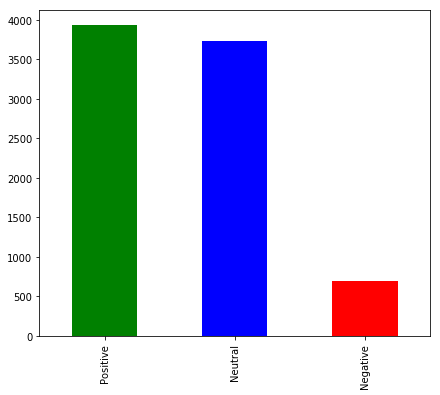

In [ ]:
import matplotlib.pyplot as plt
my_colors = ['g', 'b', 'r']  # red, green, blue, black, etc.
df_vis['label'].value_counts().plot(kind='bar', figsize=(7, 6), color=my_colors)
plt.show()

In [ ]:
df_vis['tweets'].loc[df_vis['label'] == 'Negative'][2]

'id yaaa ni gabisa login aplikasi help tulis salah server trssss plis lg butuhhh'

In [ ]:
df_vis['tweets'].loc[df_vis['label'] == 'Positive'][27]

'lebih prefer kasih duit cash or transfer di isiin ovo kalian'

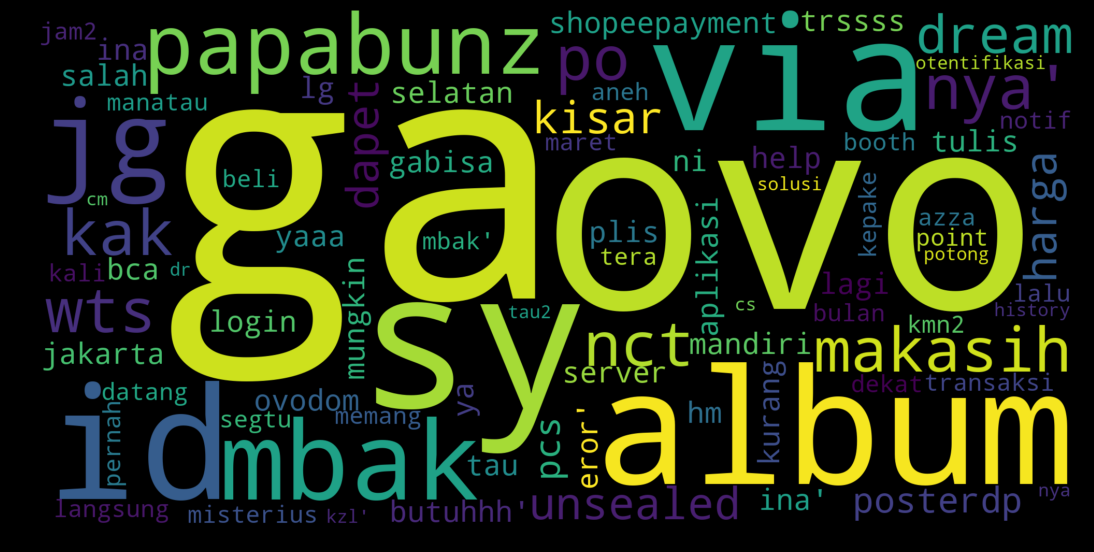

In [ ]:
from wordcloud import WordCloud

# Start with one review:
text = df_vis.tweets.values

# Create and generate a word cloud image:
wordcloud = WordCloud(width=2000, height=1000, background_color="black").generate(str(text))

# Display the generated image:
fig = plt.figure(
    figsize = (15, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# MODEL WITHOUT WORD2VEC

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, GRU
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

# Word2vec
import gensim

In [ ]:
x = df['tweets'].values
y = df['label'].values

In [ ]:
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(x)

#pad sequences
max_length = max([len(s.split()) for s in x])

#define vocabularty size
vocab_size = len(tokenizer_obj.word_index) + 1

x_tokens = tokenizer_obj.texts_to_sequences(x)
x_pad = pad_sequences(x_tokens, maxlen = max_length, padding='post')

In [ ]:
vocab_size

10638

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.2)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#LSTM MODELLING

EMBEDDING_DIM = 128
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(256, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0716 05:44:41.399770 140347730028416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 05:44:41.411705 140347730028416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 05:44:41.440536 140347730028416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0716 05:44:41.452629 140347730028416 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 53, 128)           1361664   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 53, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 1,756,675
Trainable params: 1,756,675
Non-trainable params: 0
_________________________________________________________________


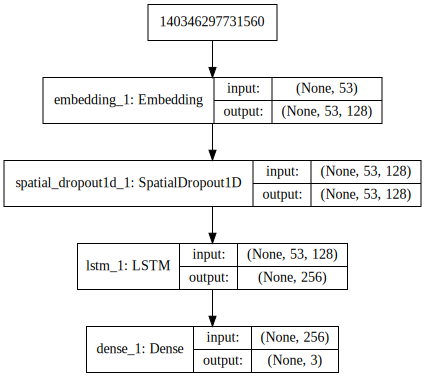

In [ ]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [ ]:
import time
print("Start training...")
history = model.fit(x_train, y_train, epochs=25, batch_size=128, verbose=2, validation_data=(x_test, y_test))
print("elapsed_time", time.time()-start_at)

Start training...
Train on 6682 samples, validate on 1671 samples
Epoch 1/25
 - 11s - loss: 0.9457 - acc: 0.4659 - val_loss: 0.9079 - val_acc: 0.4668
Epoch 2/25
 - 8s - loss: 0.9283 - acc: 0.4668 - val_loss: 0.9082 - val_acc: 0.4584
Epoch 3/25
 - 8s - loss: 0.9281 - acc: 0.4644 - val_loss: 0.9106 - val_acc: 0.4584
Epoch 4/25
 - 8s - loss: 0.9273 - acc: 0.4581 - val_loss: 0.9142 - val_acc: 0.4584
Epoch 5/25
 - 8s - loss: 0.9282 - acc: 0.4624 - val_loss: 0.9086 - val_acc: 0.4674
Epoch 6/25
 - 8s - loss: 0.9261 - acc: 0.4749 - val_loss: 0.9093 - val_acc: 0.4668
Epoch 7/25
 - 8s - loss: 0.9280 - acc: 0.4705 - val_loss: 0.9100 - val_acc: 0.4584
Epoch 8/25
 - 8s - loss: 0.9251 - acc: 0.4632 - val_loss: 0.9097 - val_acc: 0.4584
Epoch 9/25
 - 8s - loss: 0.9277 - acc: 0.4645 - val_loss: 0.9075 - val_acc: 0.4584
Epoch 10/25
 - 8s - loss: 0.9248 - acc: 0.4714 - val_loss: 0.9092 - val_acc: 0.4584
Epoch 11/25
 - 8s - loss: 0.9260 - acc: 0.4672 - val_loss: 0.9131 - val_acc: 0.4566
Epoch 12/25
 - 8s 

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=128)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

1671/1671 [==============================] - 1s 388us/step

ACCURACY: 0.4524236984912112
LOSS: 0.9110260330082627


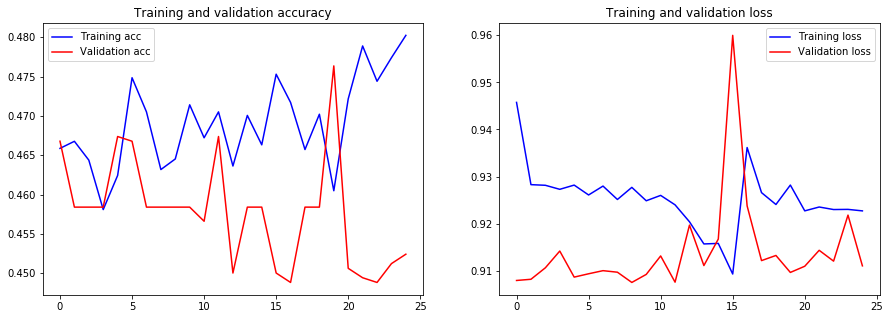

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(122)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# WORD2VEC

In [ ]:
print(x.shape)
print(y.shape)

(8353,)
(8353,)


In [ ]:
import nltk
nltk.download('punkt')

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#Import library Sastrawi buat stemming bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import re

#Mendeklarasikan fungsi untuk menghilangkan stopword
stopword_factory = StopWordRemoverFactory()
stopword = stopword_factory.create_stop_word_remover()


tweets_lines = list()
lines = x.tolist()

for line in lines:
  tokens = word_tokenize(line)
  #convert to lower case
  tokens = [a.lower() for a in tokens]
  #remove punctuation from each word
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  #remove tweets_linesremaining tokens that are not alphabetic
  words = [word for word in stripped if word.isalpha()]
  #filter out stop words
  stop_words = [stopword.remove(w) for w in words]
  tweets_lines.append(stop_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
len(tweets_lines)

8353

In [ ]:
import gensim

#train word2vec model
modelw2v = gensim.models.Word2Vec(sentences=tweets_lines,
                                  size=EMBEDDING_DIM,
                                  window=5 ,
                                  workers=4,
                                  min_count=1)
#vocab size
wordsw2v = list(modelw2v.wv.vocab)
print('Vocabulary size: %d' %len(wordsw2v))

Vocabulary size: 9389


In [ ]:
most_similar = modelw2v.wv.most_similar('ovo')
most_similar[0:5]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('tokopedia', 0.9918161630630493),
 ('kamimenginformasikan', 0.9904303550720215),
 ('debit', 0.9896862506866455),
 ('taun', 0.9896610379219055),
 ('rp', 0.9883967041969299)]

In [ ]:
#save model
file_w2v = 'ovo_embedding_w2v.txt'
modelw2v.wv.save_word2vec_format(file_w2v, binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# MODEL WITH WORD2VEC

In [ ]:
import os

embeddings_index = {}
f = open(os.path.join('', 'ovo_embedding_w2v.txt'), encoding = "utf-8")
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:])
  embeddings_index[word] = coefs

f.close()

In [ ]:
#vectorize the text samples into a 2D integer tensor
tokenizer_w2v = Tokenizer()
tokenizer_w2v.fit_on_texts(tweets_lines)
sequences = tokenizer_w2v.texts_to_sequences(tweets_lines)

#pad sequences
word_index = tokenizer_w2v.word_index
print('Found %s unique tokens.' % len(word_index))

#max_length initiallization
max_length = max([len(s.split()) for s in x])

x_w2vpad = pad_sequences(sequences, maxlen=max_length)
y_w2v = y.copy()

print(x_w2vpad.shape)
print(y_w2v.shape)

Found 9389 unique tokens.
(8353, 53)
(8353,)


In [ ]:
set(y_w2v)

{0, 1, 2}

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_w2vpad, y_w2v, test_size=0.2)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(6682, 53)
(6682, 3)


In [ ]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
  if i > num_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    #words not found in embedding_index will be all-zeros.
    embedding_matrix[i] = embedding_vector

In [ ]:
print(num_words)
print(embedding_matrix)

9390
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 6.3178316e-02  4.8473626e-01  2.7863378e-02 ... -4.3943100e-01
   2.1398850e-01  3.7307888e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 1.0879103e-04  9.0915560e-03 -6.4286370e-03 ... -5.6443760e-03
   3.5103890e-03  5.6516756e-03]
 [ 1.4557474e-03  1.8098340e-02 -1.0542988e-03 ... -7.4863690e-03
   7.7244565e-03  1.4584562e-02]
 [ 4.5861606e-03  8.2417570e-03  1.0774097e-03 ... -2.7512524e-03
   4.9296320e-03  8.7947730e-03]]


In [ ]:
from keras.initializers import Constant

#LSTM MODELLING

EMBEDDING_DIM = 128
model_w2v = Sequential()
model_w2v.add(Embedding(num_words,
                    EMBEDDING_DIM,
                    embeddings_initializer = Constant(embedding_matrix),
                    input_length = max_length,
                    trainable = False))
model_w2v.add(SpatialDropout1D(0.4))
model_w2v.add(LSTM(256, dropout_U=0.2,dropout_W=0.2))
model_w2v.add(Dense(3,activation='softmax'))
model_w2v.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(256, dropout=0.2, recurrent_dropout=0.2)`
  del sys.path[0]


In [ ]:
model_w2v.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 53, 128)           1201920   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 53, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 1,596,931
Trainable params: 395,011
Non-trainable params: 1,201,920
_________________________________________________________________


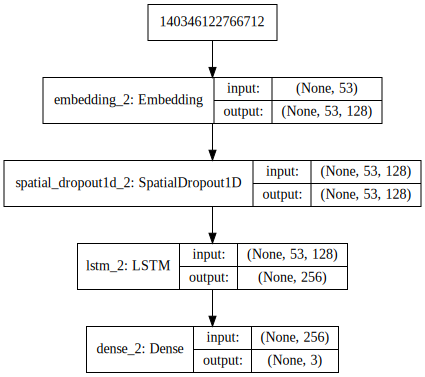

In [ ]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(model_w2v,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [ ]:
import time
print("Start training...")
start_at = time.time()
histw2v = model_w2v.fit(X_train, Y_train, epochs=25, batch_size=128, verbose=2, validation_data=(X_test, Y_test))
print("elapsed_time", time.time()-start_at)

Start training...
Train on 6682 samples, validate on 1671 samples
Epoch 1/25
 - 7s - loss: 0.9101 - acc: 0.5124 - val_loss: 0.9149 - val_acc: 0.4961
Epoch 2/25
 - 7s - loss: 0.9096 - acc: 0.5070 - val_loss: 0.9168 - val_acc: 0.5027
Epoch 3/25
 - 7s - loss: 0.9108 - acc: 0.5028 - val_loss: 0.9132 - val_acc: 0.4943
Epoch 4/25
 - 7s - loss: 0.9098 - acc: 0.5096 - val_loss: 0.9153 - val_acc: 0.4913
Epoch 5/25
 - 7s - loss: 0.9104 - acc: 0.5075 - val_loss: 0.9153 - val_acc: 0.4901
Epoch 6/25
 - 7s - loss: 0.9093 - acc: 0.5094 - val_loss: 0.9162 - val_acc: 0.4961
Epoch 7/25
 - 7s - loss: 0.9104 - acc: 0.5087 - val_loss: 0.9149 - val_acc: 0.4949
Epoch 8/25
 - 7s - loss: 0.9096 - acc: 0.5102 - val_loss: 0.9154 - val_acc: 0.4895
Epoch 9/25
 - 7s - loss: 0.9098 - acc: 0.5142 - val_loss: 0.9148 - val_acc: 0.4949
Epoch 10/25
 - 7s - loss: 0.9089 - acc: 0.5094 - val_loss: 0.9194 - val_acc: 0.4913
Epoch 11/25
 - 7s - loss: 0.9076 - acc: 0.5106 - val_loss: 0.9159 - val_acc: 0.4859
Epoch 12/25
 - 7s -

In [ ]:
score = model_w2v.evaluate(X_test, Y_test, batch_size=128)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

1671/1671 [==============================] - 1s 380us/step

ACCURACY: 0.5110712148770824
LOSS: 0.9221970597688913


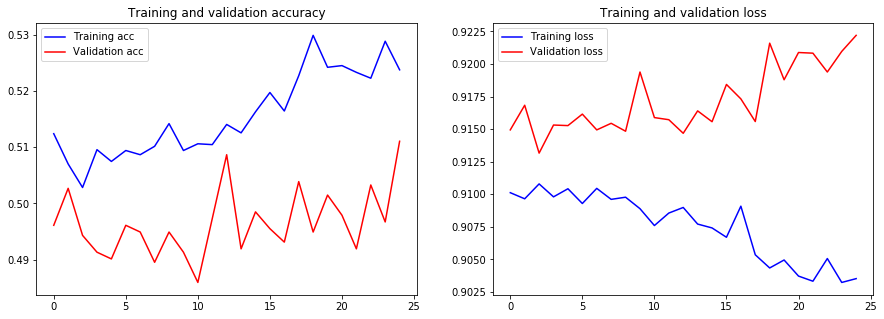

In [ ]:
acc = histw2v.history['acc']
val_acc = histw2v.history['val_acc']
loss = histw2v.history['loss']
val_loss = histw2v.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(122)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()